In [164]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import keras

from keras.layers import Embedding
from keras.layers import LSTM
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense, Dropout

np.set_printoptions(precision=4, suppress=True)

In [52]:
df = pd.read_csv('../datas.csv', sep=',', index_col='id')

subjects = ['calculus', 'algebra', 'discrete', 'ode', 'complex', 'programming',
            'stat', 'pde', 'functional', 'variational', 'random_proc', 'numerical']
years = [13, 14, 15, 16, 17]

df['course'] = [4] * 60 + [2] * 20 + [1] * 20
df['mean'] = df[subjects].mean(axis=1)
df['round'] = np.rint(df['mean'].values)

df.loc[df['year'] == 13, 'k'] = 0.8
df.loc[df['year'] == 14, 'k'] = 0.5
df.loc[df['year'] >= 15, 'k'] = 0.3

courses = {
    1: ['calculus', 'algebra', 'discrete'],
    2: ['ode', 'programming', 'complex'],
    3: ['stat', 'pde', 'functional'],
    4: ['variational', 'random_proc', 'numerical']
}

In [53]:
subject_courses = {
    1: ['calculus', 'algebra', 'discrete'],
    2: ['calculus', 'algebra', 'discrete', 'ode', 'complex', 'programming'],
    3: ['calculus', 'algebra', 'discrete', 'ode', 'complex', 'programming', 
        'stat', 'pde', 'functional'],
    4: ['calculus', 'algebra', 'discrete', 'ode', 'complex', 'programming', 
        'stat', 'pde', 'functional', 'variational', 'random_proc', 'numerical']
}

years = [13, 14, 15, 16, 17]
train_data = []


for index, row in df.iterrows():
    for i in range(1, 4):
        # [1] -> 2, [1,2] -> 3, [1, 2, 3] -> 4
        
        current_subjects = row[subject_courses[i]]
        if current_subjects.isnull().values.any():
            continue
        
        previous_mean = current_subjects.mean()
        next_subjects = row[subject_courses[i+1]]
        
        if next_subjects.isnull().values.any():
            continue
            
        next_mean = next_subjects.mean()

        train_data.append(dict(
            ege=row['ege'],
            k=row['k'],
            course=i,
            prev_mean=previous_mean,
            next_mean=next_mean,
            year=row['year']
        ))

train_df = pd.DataFrame(train_data)

x_train = train_df[['ege', 'k', 'prev_mean', 'course']].values
y_train = train_df['next_mean'].values

In [33]:
model = load_model('student_best_by_mean_prediction.h5')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_18 (Embedding)     (None, None, 1)           1024      
_________________________________________________________________
lstm_19 (LSTM)               (None, 128)               66560     
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_31 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 17        
Total params: 72,257
Trainable params: 72,257
Non-trainable params: 0
_________________________________________________________________


In [34]:
max_features = 300

model = Sequential()
model.add(Embedding(max_features, output_dim=4))
model.add(LSTM(128))
# model.add(Dropout(0.5))
model.add(Dense(32, activation='tanh'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='relu'))

model.compile(loss='mse',
              optimizer='rmsprop',
              metrics=['mae'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, None, 4)           1200      
_________________________________________________________________
lstm_7 (LSTM)                (None, 128)               68096     
_________________________________________________________________
dense_7 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_8 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 17        
Total params: 73,969
Trainable params: 73,969
Non-trainable params: 0
_________________________________________________________________


In [35]:
history = model.fit(x_train, y_train, epochs=200, batch_size=40, verbose=1, shuffle=True)

Epoch 1/200
200/200 [==============================] - 1s 5ms/step - loss: 13.6846 - mean_absolute_error: 3.6522
Epoch 2/200
200/200 [==============================] - 0s 146us/step - loss: 9.9155 - mean_absolute_error: 3.0829
Epoch 3/200
200/200 [==============================] - 0s 126us/step - loss: 3.0865 - mean_absolute_error: 1.5626
Epoch 4/200
200/200 [==============================] - 0s 155us/step - loss: 0.3972 - mean_absolute_error: 0.4858
Epoch 5/200
200/200 [==============================] - 0s 166us/step - loss: 0.3344 - mean_absolute_error: 0.4741
Epoch 6/200
200/200 [==============================] - 0s 157us/step - loss: 0.3041 - mean_absolute_error: 0.4512
Epoch 7/200
200/200 [==============================] - 0s 140us/step - loss: 0.2781 - mean_absolute_error: 0.4316
Epoch 8/200
200/200 [==============================] - 0s 161us/step - loss: 0.2646 - mean_absolute_error: 0.4175
Epoch 9/200
200/200 [==============================] - 0s 125us/step - loss: 0.2378 - mea

200/200 [==============================] - 0s 104us/step - loss: 0.0480 - mean_absolute_error: 0.1772
Epoch 73/200
200/200 [==============================] - 0s 116us/step - loss: 0.0730 - mean_absolute_error: 0.2283
Epoch 74/200
200/200 [==============================] - 0s 122us/step - loss: 0.0790 - mean_absolute_error: 0.2384
Epoch 75/200
200/200 [==============================] - 0s 137us/step - loss: 0.0380 - mean_absolute_error: 0.1488
Epoch 76/200
200/200 [==============================] - 0s 111us/step - loss: 0.0514 - mean_absolute_error: 0.1918
Epoch 77/200
200/200 [==============================] - 0s 141us/step - loss: 0.0812 - mean_absolute_error: 0.2427
Epoch 78/200
200/200 [==============================] - 0s 111us/step - loss: 0.0492 - mean_absolute_error: 0.1830
Epoch 79/200
200/200 [==============================] - 0s 132us/step - loss: 0.0309 - mean_absolute_error: 0.1356
Epoch 80/200
200/200 [==============================] - 0s 113us/step - loss: 0.0557 - mean_a

Epoch 142/200
200/200 [==============================] - 0s 107us/step - loss: 0.0541 - mean_absolute_error: 0.1857
Epoch 143/200
200/200 [==============================] - 0s 107us/step - loss: 0.0527 - mean_absolute_error: 0.1898
Epoch 144/200
200/200 [==============================] - 0s 97us/step - loss: 0.0418 - mean_absolute_error: 0.1659
Epoch 145/200
200/200 [==============================] - 0s 104us/step - loss: 0.0634 - mean_absolute_error: 0.2114
Epoch 146/200
200/200 [==============================] - 0s 100us/step - loss: 0.0329 - mean_absolute_error: 0.1402
Epoch 147/200
200/200 [==============================] - 0s 110us/step - loss: 0.0719 - mean_absolute_error: 0.2234
Epoch 148/200
200/200 [==============================] - 0s 119us/step - loss: 0.0350 - mean_absolute_error: 0.1455
Epoch 149/200
200/200 [==============================] - 0s 105us/step - loss: 0.0390 - mean_absolute_error: 0.1559
Epoch 150/200
200/200 [==============================] - 0s 129us/step - 

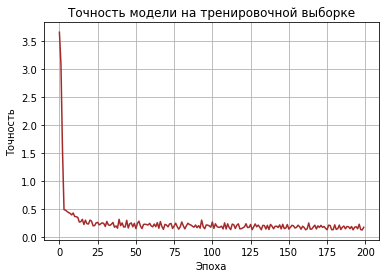

In [45]:
plt.plot(history.history['mean_absolute_error'], color='brown')
plt.grid()
plt.title('Точность модели на тренировочной выборке')
plt.ylabel('Точность')
plt.xlabel('Эпоха')
plt.savefig('model_acc_stud.png', dpi=300)

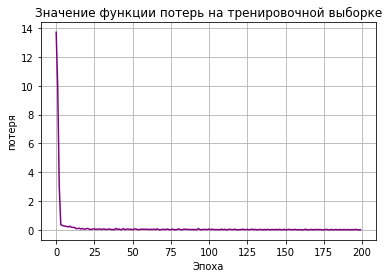

In [46]:
plt.plot(history.history['loss'], color='purple')
plt.grid()
plt.title('Значение функции потерь на тренировочной выборке')
plt.ylabel('потеря')
plt.xlabel('Эпоха')
plt.savefig('model_loss_stud.png', dpi=300)

### Прогнозирование для 2016 года 2 на  курс

20/20 [==============================] - 0s 16ms/step
[0.08269862830638885, 0.24050791561603546]


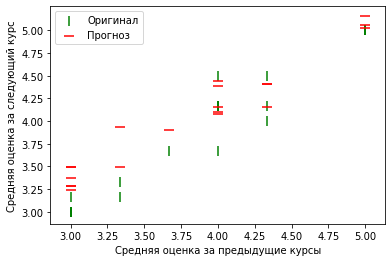

In [48]:
df_16 = train_df[train_df['year'] == 16][['ege', 'k', 'prev_mean', 'course', 'next_mean']]
x_test_16 = df_16[['ege', 'k', 'prev_mean', 'course']].values
y_test_16 = df_16['next_mean'].values

y_predict_16 = model.predict(x_test_16)

marker_size = [100 for i in range(len(x_test_16))]
plt.scatter(x_test_16[:, 2], y_test_16, marker='|', color='green', s=marker_size)
plt.scatter(x_test_16[:, 2], y_predict_16, marker='_', color='red', s=marker_size)

plt.legend(['Оригинал', 'Прогноз'])

plt.xticks(np.arange(3, 5.25, 0.25))
plt.yticks(np.arange(3, 5.25, 0.25))

plt.xlabel('Средняя оценка за предыдущие курсы')
plt.ylabel('Средняя оценка за следующий курс')

plt.savefig('16_1_to_2.png', dpi=300)
loss_and_metrics = model.evaluate(x_test_16, y_test_16)
print(loss_and_metrics)

### Прогнозирование для 15 года на 4 курс

/home/roman/PycharmProjects/exam/venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


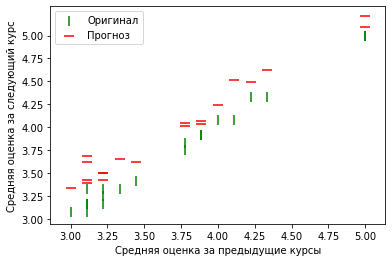

In [41]:
df_15 = train_df[train_df['year'] == 15][train_df['course']==3][['ege', 'k', 'prev_mean', 'course', 'next_mean']]
x_test_15 = df_15[['ege', 'k', 'prev_mean', 'course']].values
y_test_15 = df_15['next_mean'].values

y_predict_15 = model.predict(x_test_15)

marker_size = [100 for i in range(len(x_test_15))]
plt.scatter(x_test_15[:, 2], y_test_15, marker='|', color='green', s=marker_size)
plt.scatter(x_test_15[:, 2], y_predict_15, marker='_', color='red', s=marker_size)

plt.legend(['Оригинал', 'Прогноз'])
plt.xticks(np.arange(3, 5.25, 0.25))
plt.yticks(np.arange(3, 5.25, 0.25))
plt.xlabel('Средняя оценка за предыдущие курсы')
plt.ylabel('Средняя оценка за следующий курс');

### Рекуррентное применение модели для прогноза средней успеваемости потоков

#### 2016 год. Предсказание с 3 по 4 курс

In [149]:
recurrent_series_16 = df.loc[df['year'] == 16, ['ege', 'k']].copy()
recurrent_series_16[1] = df.loc[df['year'] == 16, courses[1]].mean(axis=1)
recurrent_series_16[2] = df.loc[df['year'] == 16, courses[1] + courses[2]].mean(axis=1)

for i in range(2, 4):
    recurrent_series_16['course'] = i
    x = recurrent_series_16[['ege', 'k', i, 'course']].values
    y_predict = model.predict(x)
    recurrent_series_16[i+1] = y_predict

recurrent_series_16 = recurrent_series_16.drop(['ege', 'k', 'course'], axis=1)

#### Получившийся ряд предсказаний для 2016 года

In [151]:
recurrent_series_16

,1,2,3,4
id,,,,
61,5.000000,5.000000,5.041891,5.064061
62,5.000000,5.000000,5.072940,5.093863
63,5.000000,5.000000,5.170376,5.187378
64,4.000000,4.166667,4.143334,4.199033
65,4.000000,4.166667,4.418089,4.463993
66,4.333333,4.000000,4.192930,4.246901
67,4.000000,4.500000,4.476712,4.520451
68,4.333333,4.166667,4.444728,4.489649
69,4.333333,4.500000,4.440095,4.485196


#### Статистические параметры ряда разностей курсов (2-1, 3-2, 4-3, 4-2) для ряда предсказаний 2016 года

In [160]:
difference_series_16 = pd.DataFrame.from_dict({
    '2-1': recurrent_series_16[2] - recurrent_series_16[1],
    '3-2': recurrent_series_16[3] - recurrent_series_16[2],
    '4-3': recurrent_series_16[4] - recurrent_series_16[3],
    '4-2': recurrent_series_16[4] - recurrent_series_16[1],
})
difference_series_16.describe()

,2-1,3-2,4-3,4-2
count,20.000000,20.000000,20.000000,20.000000
mean,0.016667,0.227782,0.056910,0.301358
std,0.186535,0.205276,0.020269,0.247464
min,-0.333333,-0.059905,0.017002,-0.245951
25%,0.000000,0.035731,0.045056,0.155202
50%,0.000000,0.264742,0.058604,0.320276
75%,0.166667,0.356497,0.073933,0.474483
max,0.500000,0.644765,0.080940,0.705649


#### 2017 год. Предсказание с 2 по 4 курс

In [161]:
recurrent_series_17 = df.loc[df['year'] == 17, ['ege', 'k']].copy()
recurrent_series_17[1] = df.loc[df['year'] == 17, courses[1]].mean(axis=1)

for i in range(1, 4):
    recurrent_series_17['course'] = i
    x = recurrent_series_17[['ege', 'k', i, 'course']].values
    y_predict = model.predict(x)
    recurrent_series_17[i+1] = y_predict

recurrent_series_17 = recurrent_series_17.drop(['ege', 'k', 'course'], axis=1)

#### Получившийся ряд предсказаний для 2017 года

In [165]:
recurrent_series_17

,1,2,3,4
id,,,,
81,5.000000,4.945882,4.319802,4.369268
82,5.000000,4.926412,4.281124,4.331987
83,5.000000,4.939455,4.306961,4.356904
84,5.000000,4.900513,4.230042,4.282711
85,4.000000,4.151478,4.192930,4.246901
86,4.333333,4.443028,4.476712,4.520451
87,4.333333,4.378499,4.413946,4.460008
88,4.000000,3.865477,3.320665,3.401030
89,4.000000,3.848148,3.298915,3.379855


#### Статистические параметры ряда разностей курсов (2-1, 3-2, 4-3, 4-2) для ряда предсказаний 2017 года

In [166]:
difference_series_17 = pd.DataFrame.from_dict({
    '2-1': recurrent_series_17[2] - recurrent_series_17[1],
    '3-2': recurrent_series_17[3] - recurrent_series_17[2],
    '4-3': recurrent_series_17[4] - recurrent_series_17[3],
    '4-1': recurrent_series_17[4] - recurrent_series_17[1],
})
difference_series_17.describe()

,2-1,3-2,4-3,4-1
count,20.000000,20.000000,20.000000,20.000000
mean,0.132725,-0.181291,0.060907,0.012341
std,0.257111,0.318657,0.015345,0.525821
min,-0.224899,-0.670471,0.039891,-0.717289
25%,-0.080063,-0.549233,0.047313,-0.620145
50%,0.077430,0.035015,0.053320,0.179869
75%,0.386411,0.056415,0.075581,0.467418
max,0.548952,0.059059,0.080940,0.629163


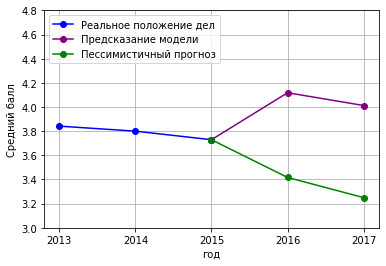

In [170]:
# real data
real_mean = {
    2013: df.loc[df['year'] == 13]['mean'].mean(),
    2014: df.loc[df['year'] == 14]['mean'].mean(),
    2015: df.loc[df['year'] == 15]['mean'].mean()
}

x_real_mean = real_mean.keys()
y_real_mean = real_mean.values()

# model forecasting
model_mean = {
    2015: real_mean[2015],
    2016: recurrent_series_16[4].mean(),
    2017: recurrent_series_17[4].mean(),
}


x_model_mean = model_mean.keys()
y_model_mean = model_mean.values()

# pessimistic forecasting
pessimistic_df = df.copy()
pessimistic_df.loc[pessimistic_df['year'] == 16, courses[3] + courses[4]] = 3
pessimistic_df.loc[pessimistic_df['year'] == 17, courses[2] + courses[3] + courses[4]] = 3
pessimistic_df['mean'] = pessimistic_df[subjects].mean(axis=1)

pessemistic_mean_by_flow = {
    2015: pessimistic_df.loc[pessimistic_df['year'] == 15]['mean'].mean(),
    2016: pessimistic_df.loc[pessimistic_df['year'] == 16]['mean'].mean(),
    2017: pessimistic_df.loc[pessimistic_df['year'] == 17]['mean'].mean(),
}

x_pess_mean = pessemistic_mean_by_flow.keys()
y_pess_mean = pessemistic_mean_by_flow.values()

plt.errorbar(x_real_mean, y_real_mean, marker='o', color='blue')
plt.errorbar(x_model_mean, y_model_mean, marker='o', color='purple')
plt.errorbar(x_pess, y_pess, marker='o', color='green')

plt.ylabel('Средний балл')
plt.xlabel('год')

plt.legend(['Реальное положение дел', 'Предсказание модели', 'Пессимистичный прогноз'], loc=2)
plt.xticks(np.arange(2013, 2017+1, 1))
plt.yticks(np.arange(3, 5, 0.2))
plt.grid()
plt.savefig('mean_by_flow_with_prediction.png', dpi=300)

In [171]:
# model.save('student_believable_by_mean_prediction.h5')

### Средняя оценка для потока 2016 года на 2 курс

In [80]:
df.loc[df['year'] == 16, courses[1] + courses[2]].mean(axis=1).mean()

3.833333333333333

### Средняя оценка для потока 2016 года на 1 курс

In [84]:
df.loc[df['year'] == 16, courses[1]].mean(axis=1).mean()

3.8166666666666664

### Средняя оценка для потока 2017 года на 1 курс

In [81]:
df.loc[df['year'] == 17, courses[1]].mean(axis=1).mean()

4.0